----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
 
( November, 7th, 2022)
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


Esta es la parte práctica del examen de Visión artificial, curso 2022-23. 

El examen práctico debería ser resuelto en un máximo de 2,5 horas. Cada ejercicio se encuentra definido con su correspondiendiente puntuación. Priorice adecuadamente. 

Para aprobar la asignatura se han de aprobar ambas partes, teórica y práctica. El examen teórico será el día 16 de Noviembre desde las 15h hasta las 16h en B7. 

Tengase en cuenta que no es tan importante que el resultado final del problema práctico sea exactamente igual a los ejemplos que pueden proporcionarse en los enunciados, sino que se tendrá en cuenta cómo el alumno resuelve el problema y domina los conceptos de la asignatura. Por lo tanto, explicad y documentad bien las soluciones.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

## Ejercicio 1.

### FIFA World Cup

<img src="./images_notebook/world_cup.jpg">

A finales de este mes se celebrará en Qatar la Copa del Mundo de Futbol. A lo largo del globo, personas de todos los países esperan disfrutar de la competición y conocer qué país tiene el equipo más importante. Antes de que comience el torneo, nosotros vamos a realizar nuestra propia predicción.

Nuestra profesora está ilusionada y ha hecho la predición de que la final será disputada por la selección de **Bulgaria** y **Portugal**. Aquí os dejo sus respectivas banderas para que les echeís un ojo.

<img src="./images_notebook/Bulgaria_Portugal.png">

**Nosotros vamos a crear las dos Banderas para realizar nuestra propia predicción.**


**Ex. 1.1) (0.5 pt)**  Comenzaremos creando la Bandera de Bulgaria. Para ello crearemos una imagen RGB con dimensions 200x300. La imagen será de tipo uint8. Los valores para cada franja serán: Blanco, Rojo ([240,0,0]) y Verde ([0, 0, 170]).

**Crear la imagen y visualizarla. Guardar la imagen en formato png.**

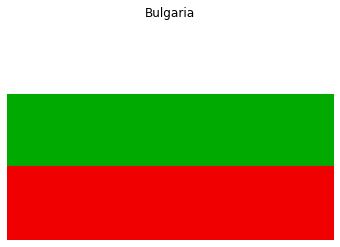

In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Initialize array of the asked shape, with dtype uint8
bulgaria = np.zeros((200, 300, 3), dtype='uint8')

one_third = 200 // 3

# It makes the broadcast automatically
# I made the colors with the order accoring to the image from the statement
bulgaria[:one_third] = (255, 255, 255)          # White (255 is the max value)
bulgaria[one_third:2*one_third] = (0, 170, 0)   # Green (was blue in the statement?)
bulgaria[2*one_third:] = (240, 0, 0)            # Red

# Save the image. I save it in the direct directory to be able to tell apart from the rest
io.imsave('bulgaria.png', bulgaria) # in the folder images_notebook

plt.imshow(bulgaria)
plt.title('Bulgaria')
plt.axis('off')
plt.show()

**Ex. 1.2) (1.5 pt)**  La bandera de Portugal es un poco más complicada. Comenzaremos creando  una imagen RGB con dimensions 200x300. Los valores para cada franja serán: Rojo [206,0,0] y Verde [0, 142, 0]. La franja verde tendrá 120 pixels de ancho.

Después deberemos insertar el escudo. Para ello hemos de leer la imagen `images_notebook/escudo_Portugal.jpg`. Dentro de la bandera, el escudo tendra un tamaño de 100x100 pixels. 

Al final, la bandera debería ser **similar** a la propuesta anteriormente.

**Crear la imagen y visualizarla. Guardar la imagen en formato png.**

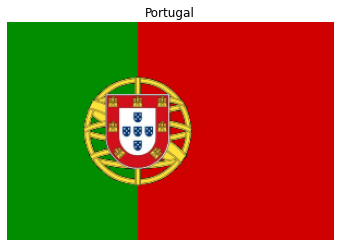

In [2]:
from skimage.transform import resize
from skimage import img_as_ubyte

# We create the portugal image
portugal = np.zeros((200, 300, 3), dtype='uint8')
portugal[:, :120] = (0, 142, 0)
portugal[:, 120:] = (206, 0, 0)


# Load the shield
escudo_original = io.imread('images_notebook/escudo_Portugal.jpg')

# Resize to 100x100(x3) pixels
escudo_float = resize(escudo_original, (100, 100))

# We will work with uint8 as the last exercise
escudo = img_as_ubyte(escudo_float)


# Create a mask where the shield is not almost black
mask = np.apply_along_axis(lambda x: not np.all(x < 30), 2, escudo)

# We add the shield at the pixels where mask = True
portugal[50: 50+escudo.shape[0], 70:70+escudo.shape[1]][mask] = escudo[mask]

# Save the image
io.imsave('portugal.png', portugal)

plt.imshow(portugal)
plt.title('Portugal')
plt.axis('off')
plt.show()

**Ex. 1.3) (0.5 pt)**  Para hacer nuestra predicción final, convertiremos ambas imágenes a escala de grises  y restaremos las dos imágenes (haciendo `Bulgaria_gray` **-** `Portugal_gray`). Visualizaremos las tres imágenes en una sola figura, con sus respectivos nombres.

Calcularemos la media de la imagen de diferencias. Si la media sale positiva, el **Bulgaria** se llevará la copa del mundo. En caso de que sea negativa, será **Portugal** el campeón.

En este caso, **quién ganará el mundial?**

Bulgaria será el campeón


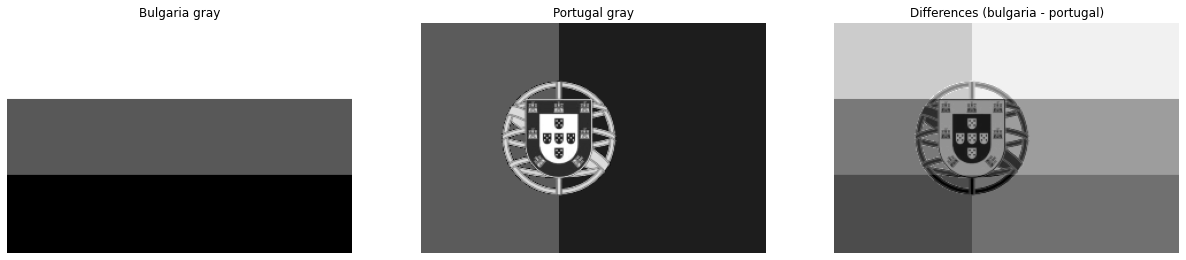

In [3]:
from skimage.color import rgb2gray

# Now they are floats
bulgaria_gray = rgb2gray(bulgaria)
portugal_gray = rgb2gray(portugal)
differences = bulgaria_gray - portugal_gray # Podemos restar, tienen la misma dimensión

fig, axs = plt.subplots(ncols=3, figsize=(21, 7))

axs[0].imshow(bulgaria_gray, cmap='gray')
axs[0].set_title('Bulgaria gray')
axs[0].axis('off')

axs[1].imshow(portugal_gray, cmap='gray')
axs[1].set_title('Portugal gray')
axs[1].axis('off')

axs[2].imshow(differences, cmap='gray')
axs[2].set_title('Differences (bulgaria - portugal)')
axs[2].axis('off')

media = np.mean(differences)
print('Bulgaria' if media > 0 else 'Portugal', 'será el campeón')

plt.show()

## Ejercicio 2

### Pay per View

Por desgracia, uno de los grandes problemas que tenemos los aficionados a la hora de ver el futbol es que la mayoría de los partidos se emiten por pay per view. Como buenos informáticos, hemos realizado una búsqueda por internet para encontrar alguna página que nos permita ver los partidos que nos interesen. Sin embargo, la calidad no es óptima. Os dejo una muestra:

<img src='images_notebook/big_frame.jpg'>

**Vamos a probar algunos filtros a ver si podemos mejorar la calidad**

**Ex 2.1) (1 pt.)** Leed la imagen `images_notebook/big_frame.jpg` y aplicad los filtros conocidos por la prácticas: **filtro de media**, **filtro de mediana** y **filtro gausiano**. 

En el filtro de media, utilizaremos un máscara 2D para realizar la convolución. En el filtro de mediana, utilizaremos el kernel disk (`from skimage.morphology import disk`) tal y como se realizó en la practicas.

Teneís que buscar un tamaño de las máscaras, así como el valor sigma del filtro gausiano, adecuado para reducir el ruido pero que, a su vez, se puedan diferenciar las formas de la imagen. 

**Visualizar la imagen original y las resultantes en una sola figura, con sus respectivos títulos. Comentad brevemente qué hace cada filtro así como cual puede ser más adecuado para este problema.**

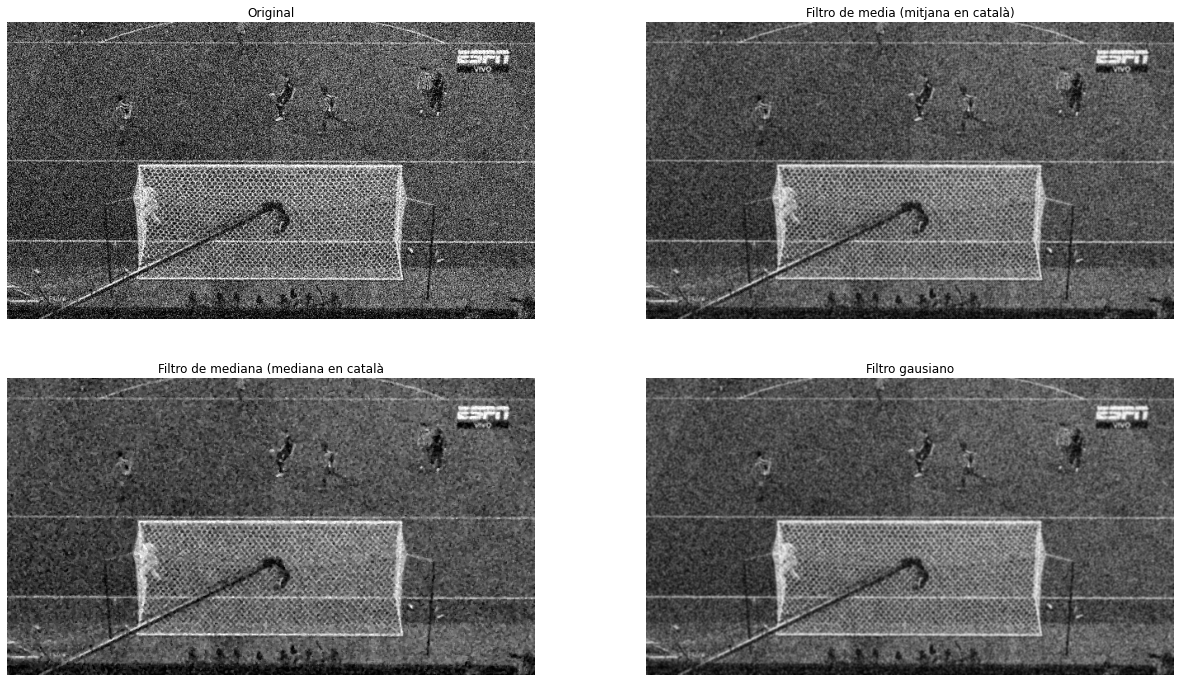

In [25]:
from skimage.filters import median, gaussian
from skimage.morphology import disk
from scipy.ndimage import convolve

# Imagen original
big_frame = io.imread('images_notebook/big_frame.jpg')

# Filtro de media. Suaviza la imagen, poniendo como nuevo valor en cada pixel
# la media de los pixeles antiguos que están en el disco centrado en el pixel
# antiguo y como radio el parametro que le demos. Es parecido al que usamos en
# clase pero en vez de hacer la media sobre un cuadrado de los pixeles cercanos,
# hace la media sobre un círculo de los píxeles cercanos. Si le ponemos
# radio >= 2, la imagen ya se empieza a ver bastante borrosos los jugadores!
mask = disk(radius=1)
normalized_mask = mask / mask.sum()
filter_media = convolve(big_frame, normalized_mask)

# Filtro de mediana. En vez de hacer la media como en el caso anterior aquí se
# hace la mediana. Esto hace que los colores presentes en la imagen siguen
# siendo los mismos, ya que se "coge" el que está en medio. Lo bueno es que
# teóricamente los edges no se deberían perder (ya que es no lineal, a 
# diferencia de los otros 2), aunque como hay un montón de ruido parece que
# igualmente los edges se pierden un poco
filter_mediana = median(big_frame)

# Filtro de Gauss. Es parecido al filtro de media, aunque en vez de ponderar
# todos los píxels por igual en este se ponderan más los más próximos al píxel
# original. Probablemente es la que debería funcionar mejor, ya que el ruido
# parece que es gausiano (hay un montón de píxeles blancos y negros por toda
# la imagen, por lo que la mediana será difícil que dé buenos resultados con
# tanta variación y la gausiana siempre es un poco mejor definida que simplemente
# aplicar la media). El factor que se podnera depende de sigma, que seria como
# la desviación típica de una distribución normal.

# Con un sigma bajo (< 1) vemos que la mayoría del ruido ya se ha eliminado,
# y si lo augmentamos ligeramente le empieza a perder resolución en los jugadores.
filter_gauss = gaussian(big_frame, sigma=0.9)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(21, 12))

axs[0, 0].imshow(big_frame, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(filter_media, cmap='gray')
axs[0, 1].set_title('Filtro de media (mitjana en català)')
axs[0, 1].axis('off')

axs[1, 0].imshow(filter_mediana, cmap='gray')
axs[1, 0].set_title('Filtro de mediana (mediana en català')
axs[1, 0].axis('off')

axs[1, 1].imshow(filter_gauss, cmap='gray')
axs[1, 1].set_title('Filtro gausiano')
axs[1, 1].axis('off')

plt.show()

**Ex 2.2) (1 pt.)** Utilizando sólamente el filtro que os parezca más adecuado, vamos a aplicarlo a todo un video. Para ello, carga y visualiza las imágenes que se encuentra en el carpeta `images_notebook/video_random`. Una vez comprobado que todo funciona correctamente (las imágenes han de verse con ruido), aplica el filtro que mejor resultado te haya dado en el apartado anterior para visualizar las imágenes tan limpias como sea posible.

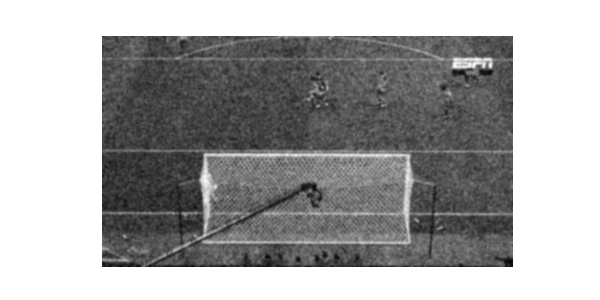

In [44]:
# El filtro que elimina mejor el ruido es el gausiano

import matplotlib.animation as animation

# En VSCode nbagg doesn't work, we'll use 'widget' (uses ipyml) to play videos
%matplotlib widget

# Reading a sequence of images from a folder
ic = io.ImageCollection('images_notebook/video_random/*.jpg')

# Computamos previamente las imagenes con el ruido eliminado porque si no a veces
# el vídeo se encalla. Para este ejercicio, como vemos un montón de imagenes,
# parece que quizá deberíamos augmentar un poco más el parámetro sigma del apartado
# anterior, ya que al pasar de un frame al otro parece que el sigma=0.9 no terminaba
# de reducir todo el ruido del vídeo, así que lo augmentamos un poco más (al ser un
# vídeo, la resolución de los jugadores ya no importa tanto y ahora el ruido molesta
# más, por lo que es natural augmentar en este ligeramente el sigma). De hecho
# aun aumentado el sigma se ve bastante diferencia de ruido entre frames, pero si 
# lo augmentamos demasiado empezamos a perder demasiado resolución. Con sigma=1.8
# ya se pierde demasiado resolución en los jugadores, por lo que lo he dejado co
# sigma = 1.5 (en el apartado anterior era 0.9 pero tambíen usabamos la gausiana)
blurred_ic = [gaussian(image, sigma=1.5) for image in ic]

fig = plt.figure(figsize=(6, 3))        # Create figure
plt.axis('off')
im = plt.imshow(blurred_ic[0], animated=True, cmap='gray')   # Visualize the first image

def run(i):                 # Updating the frame visualization
    im.set_array(blurred_ic[i])     # Changing the content of the canvas
    return im,              # to return a tuple!

# The code execution is slower than 1ms, so if interval=1 then the fps
# are the speed to compute each iteration, which varies notably.
# Because of this we've fixed 24 fps (with interval 1 / 24 * 1000 ms)
INTERVAL_24_FPS = 42
ani = animation.FuncAnimation(fig, run, interval=INTERVAL_24_FPS, blit=True, frames=len(blurred_ic), repeat= False)
plt.show()

## Ejercicio 3.

En los años 90, dos grandes estrellas del balón nos hicieron vibrar, enseñándonos a jugar al futbol como nunca antes se había hecho. Corriendo por kilométricos campos de futbol, que hacían temblar a los terraplanistas, nos enseñaban semana a semana lo que era el fair play. ¿Tal vez fue Figo? ¿Ronaldo el gordo? ¿Roberto Carlos y sus disparos con efecto?... **NO!** Los grandes ídolos de la época fueron Oliver y Benji, conocidos por la serie Campeones. 

<img src='images_notebook/campeones_1.jpg' width= 600>


In [46]:
%matplotlib inline

**Ex 3.1) (0.5 pt.)** Lee la imagen `images_notebook/campeones_frame.png`. Visualiza la imagen e imprime el tipo de datos así como el tamaño de la misma (número de filas, número de columnas y canales)

Tipo de datos: uint8
Tamaño imagen (nº filas, nº columnas, nº canales): (426, 689, 4)


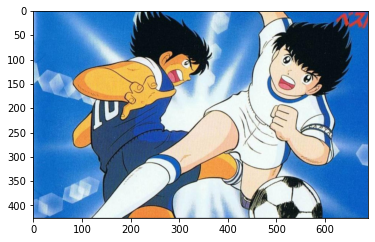

In [47]:
campeones_frame = io.imread('images_notebook/campeones_frame.png')

print('Tipo de datos:', campeones_frame.dtype)
print('Tamaño imagen (nº filas, nº columnas, nº canales):', campeones_frame.shape)

plt.imshow(campeones_frame)
plt.show()

**Ex 3.2) (2 pt.)** Vamos a segmentar la imagen utilizando los algoritmos de Fenzenszwalb, SLIC y Quickshift. Para cada uno de ellos, busca unos parámetros que parezcan adecuados. Por ejemplo, para el Fenzenszwald, modifica `scale`, `sigma` y `min_size`. En caso de SLIC, teenmos `n_segments`, `compactness`y `sigma`.

**Explica brevemente en qué consiste cada uno de los algoritmos y visualiza la segmentación resultante.**

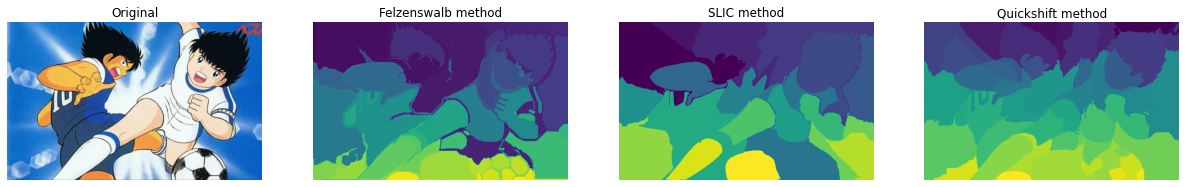

In [59]:
from skimage.segmentation import mark_boundaries, felzenszwalb, slic, quickshift
from skimage.color import rgba2rgb

# We transfrom it to float RGB to avoid possible problems
campeones = rgba2rgb(campeones_frame)

# Los parámetros los he probado individualmente para cada método y dejado los que en
# mi opinión se veían mejor. Para que no tardase demasiado la ejecución de esta celda
# solo he guardado los parámetros finales obtenidos de cada método, ya que por ejemplo
# en el quickshift ejecutar una sola vez con un kernel_size suficiente ya tarda 20 segones+.

# Felzenswalb es un algoritmo aglomerativo, que parte de que todos los píxeles son
# un cluster diferente y va sucesivamente ajuntando los clusters más parecidos siguiendo
# unos criterios. El felzenswalb es parecido a un Minimum Spanning Tree, donde se añade
# en cada paso la conexión (2 clusters -> 1 cluster) que tiene menos peso. Se considera
# como propiedades de cada pixel tanto el color como la posición. scale es un parametro
# de alto nivel de que grandaria queremos resultados (más segmentos y pequeños o menos
# segmentos y grandes), min_size es para no hacer clusters muy pequeños, sigma es la
# típica gausiana.
filtro_fel = felzenszwalb(campeones, scale=500, sigma=1.5, min_size=100)
imagen_fel = mark_boundaries(campeones, filtro_fel)

# SLIC significa Sucessive Linear Iterative Clustering. Segmenta la imagen con el
# método K-means: se eligen K centros iniciales arbitrariamente y en cada iteración
# se van ajustando los centros minimizando las distancias a los pixeles próximos
# (también se usa el espacio euclidiano que tiene como coordenadas el color y la
# posición). En unos pasos los centros pasan a ser estables. n_segments es aprox.
# cuántos clusters queremos, compactness es una ratio de color vs distancia y 
# sigma es la típica gausiana
filtro_slic = slic(campeones, n_segments=30, compactness=10, sigma=1.3)
imagen_slic = mark_boundaries(campeones, filtro_slic)

# Quickshift es un poco parecido a los otros dos, puede dar resultados un poco mejores
# pero en general tarda un poco más de tiempo en computar los clusters. Trabaja con
# "ventanas", que son una especie de cuadrados de píxels juntos. Se escogen diferentes
# ventanas y se van ajustando para ver hacia donde tienden los puntos de dicha ventana.
# Como en los otros dos, como puntos se puede usar (color, posición). Viendo hacia donde
# tiende cada ventana se eligen los clusters (los que tienden al mismo sitio serán del
# mismo cluster). kernel_size es el tamaño de la ventana, ratio es como de importante es
# color vs distancia, max_dist sirve para hacer menos segmentos, sigma es la tipica gausiana.
filtro_quick = quickshift(campeones, kernel_size=10, ratio=1, sigma=1.5, max_dist=50)
imagen_quick = mark_boundaries(campeones, filtro_quick)

def plot_row(images, titles):
    fig, axs = plt.subplots(ncols=len(images), figsize=(21, 7))
    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.show()

# Como en la siguiente celda ya visualizaremos y compararemos las imagenes,
# en esta celda simplemente visualizaremos los clusters.
plot_row([campeones, filtro_fel, filtro_slic, filtro_quick], ['Original', 'Felzenswalb method', 'SLIC method', 'Quickshift method'])

**Ex 3.3) (0.5 pt.)** Visualiza las tres segmentaciones, con sus respectivos títulos en una sola imagen y comparalas. **¿Cuál te parece la más adecuada?**

<img src='images_notebook/campeones_segmentation.png'>

nº clusters Felzenswalb: 83
nº clusters SLIC:        19
nº clusters Quickshift:  52


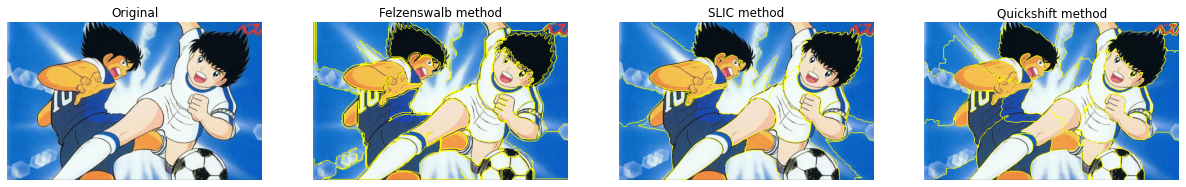

In [70]:
'''
Con los parámetros escogidos en el apartado anterior, los resultados son los siguientes:

- Felzenswalb identifica correctamente prácticamente todos los clusters importantes, aunque
contando el nº de clusters que ha dado y viendo que hay líneas un poco pequeñas, probablemente
nos hemos pasado un poco en nº de segmentos. Por ejempo, la línea del cabello está bastante
marcada y no coincide exactamente con la línea del negro real.

- SLIC ha capturado mejor los clusters esenciales sin identificar clusters poco importnates,
aunque hay algún segmento como el brazo de arriba del jugador de la derecha que se lo ha dejado,
y la pelota tampoco la ha segmentado. Sin embargo, el cabello y la silueta de los jugadores la
ha hecho bastante bien.

- Quickshift es el que mejores resultados ha dados con los parámetros escogidos. Ha segmentado
bastatnte bien la silueta de los jugadores, así como su cabello y también partes de la ropa
y la pelota. El nº de clusters ha salido de 52, que está entre 83 de Felzenswalb que había
hecho demasiados clusters y los 19 de SLIC donde faltaban algunos clusters más para algunos
detalles medio importantes de la images. Sin embargo, Quickshift también es el que ha tardado
más en segmentar la imagen y con bastante diferencia.
'''

print('nº clusters Felzenswalb:', np.unique(filtro_fel).shape[0])
print('nº clusters SLIC:       ', np.unique(filtro_slic).shape[0])
print('nº clusters Quickshift: ', np.unique(filtro_quick).shape[0])

plot_row([campeones, imagen_fel, imagen_slic, imagen_quick], ['Original', 'Felzenswalb method', 'SLIC method', 'Quickshift method'])